In [2]:
from glob import glob
import numpy as np
import pandas as pd
import re

df_bookmark100_rensai = pd.read_csv("bookmark100_rensai.csv", index_col = 0)

In [3]:
df_bookmark100_rensai.head(5)

,title,ncode,userid,writer,story,biggenre,genre,gensaku,keyword,general_firstup,...,title_tagged,title_segment,Segment,Year,title_character,morethan100,story_character,term,type,title_split
0,「もうお前は用済みだ」とパーティをクビになった魔道具収集家は冒険者と魔道具店の二足のわらじで...,N4412HE,761640,みまさと みか,「もうお前は用済みなんだよ」\n\nSランクパーティに昇格した【銀翼の翼】のリーダー、ケント...,2,201,NaN,R15 残酷な描写あり オリジナル戦記 日常 冒険 男主人公 人外 魔王 ハーレム チート ...,31/08/2021 11:17,...,"「_補助記号,括弧開,,,,,,「,「, もう_副詞,,,,,,モウ,もう,もう,モー お前...",「 もう お前 は 用済み だ 」 と パーティ を クビ に なっ た 魔道 具 収集 家...,「 もう お前 は 用済み な ん だ よ 」 S ランク パーティ に 昇格 し た 【 ...,2021,98,0,498,68,51,"['「', 'もう', 'お前', 'は', '用済み', 'だ', '」', 'と', '..."
1,妹のドアマットから解放された私は公爵家の家庭教師になりまして,N8451HC,1428410,春乃紅葉,家族から使用人のように扱われていたコレットは、兄の友人であるヴェルネル＝ダヴィアから婚約を申...,1,101,NaN,R15 身分差 女主人公 婚約破棄 ざまあ要素あり 幼馴染み 魔法 ハッピーエンド ドアマット 妹,31/07/2021 07:18,...,"妹_名詞,普通名詞,一般,,,,イモウト,妹,妹,イモート の_助詞,格助詞,,,,,ノ,の...",妹 の ドア マット から 解放 さ れ た 私 は 公爵 家 の 家庭 教師 に なり まし て,家族 から 使用 人 の よう に 扱わ れ て い た コレット は 、 兄 の 友人 で...,2021,30,0,510,20,19,"['妹', 'の', 'ドア', 'マット', 'から', '解放', 'さ', 'れ', ..."
2,絶望を生き抜いた男は、陰に潜んで人生イージーモードを楽しむ～最凶の冒険者な暗殺者～,N0362HD,1878921,乙夜 然,突然の転移により異世界へと舞い降りた主人公。\n危惧した通りのハードモード開始に絶叫しながら...,2,201,NaN,R15 残酷な描写あり 異世界転移 闇/暗躍/無双 主人公最強/転移 ノンハーレム 影/隠密...,03/08/2021 20:22,...,"絶望_名詞,普通名詞,サ変可能,,,,ゼツボウ,絶望,絶望,ゼツボー を_助詞,格助詞,,,...",絶望 を 生き 抜い た 男 は 、 陰 に 潜ん で 人生 イージー モード を 楽しむ ...,突然 の 転移 に より 異 世界 へ と 舞い降り た 主人 公 。 危惧 し た 通り ...,2021,41,0,473,27,24,"['絶望', 'を', '生き', '抜い', 'た', '男', 'は', '、', '陰..."
3,安達弾～打率２割の１番バッター～,N8022FP,1635043,林一,５歳の頃から実家のバッティングセンターで毎日バットを振っていた安達少年。近所に野球チームが...,3,302,NaN,青春 野球 スポーツ 努力 友情 ヒューマンドラマ バッター ピッチャー,14/07/2019 07:00,...,"安達_名詞,固有名詞,地名,一般,,,アダチ,アダチ,安達,アダチ 弾_接尾辞,名詞的,一般...",安達 弾 ～ 打率 ２ 割 の １ 番 バッター ～,５ 歳 の 頃 から 実家 の バッティング センター で 毎日 バット を 振っ て い ...,2019,16,0,226,11,10,"['安達', '弾', '～', '打率', '２', '割', 'の', '１', '番'..."
4,追放された助言士のギルド経営～鑑定を駆使し、不遇な素質持ちに一つを極めさせたら、いつの間に...,N2415HE,2192164,柊彼方,「お前はもう用済みだ。ギルドから去れ」\n\n不遇スキルである『鑑定』を持つ【助言士】ロイド...,2,201,NaN,オリジナル戦記 男主人公 チート 魔法 内政 成り上がり 追放ざまぁ 鑑定 助言士 ざまあ ...,27/08/2021 17:00,...,"追放_名詞,普通名詞,サ変可能,,,,ツイホウ,追放,追放,ツイホー さ_動詞,非自立可能,...",追放 さ れ た 助言 士 の ギルド 経営 ～ 鑑定 を 駆使 し 、 不遇 な 素質 持...,「 お前 は もう 用済み だ 。 ギルド から 去れ 」 不遇 スキル で ある 『 鑑定...,2021,67,0,694,43,34,"['追放', 'さ', 'れ', 'た', '助言', '士', 'の', 'ギルド', '..."


In [7]:
docs = df_bookmark100_rensai["title_segment"].fillna("NA").apply(lambda x: ["\\t" if each in ["\u3000"," "] else each for each in x.split(" ")]).apply(lambda x:[each for each in x if each!=""])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


count_vectorizer = CountVectorizer(max_features=100,min_df=0.01,
                                       ngram_range=(1, 3), 
                                       token_pattern=r"\b(\w+|\W+)\b",
                                       tokenizer=lambda x: x,
                                       preprocessor=lambda x: x)
count_matrix = count_vectorizer.fit_transform([each for each in docs])

In [9]:
def run_rf(categories, vectorizer, matrix):
    x_train, x_test, y_train, y_test = train_test_split(
        matrix, categories, test_size=0.3, random_state=0, stratify = categories
    )
    classifier = RandomForestClassifier(n_estimators=100, random_state=0)
    classifier.fit(matrix, categories)
    y_pred = classifier.predict(x_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

    feat_importances = pd.Series(classifier.feature_importances_, index=vectorizer.get_feature_names())
    feat_importances.nlargest(50).plot(kind='barh', figsize=(12, 12))

[[ 265    0    0    0    0   79   56    0    2    0    0    4    0    1
     1    4   17    0    0    0    0]
 [   0   52    0    0    0   14   16    0    0    0    0    0    0    0
     1    0    7    0    0    0    0]
 [   1    0   73    0    0   18   39    0    0    0    0    2    0    0
     0    1    6    0    0    0    0]
 [   0    1    0   42    0    4   12    0    0    0    0    1    0    0
     0    1    6    0    0    0    0]
 [   2    0    0    0  205   13   22    0    1    0    0    1    0    0
     0    4   16    0    0    0    0]
 [   5    1    1    1    5  772  326    1    1    1    0    9    0    0
     1   28  138    1    0    0    0]
 [   8    0    1    1    2  196 3595    2    2    0    0    5    0    0
     6   22  158    0    0    1    0]
 [   1    0    0    0    0    8    9   22    1    0    0    0    0    0
     0    0    2    0    0    0    0]
 [   1    0    0    0    0   28   45    0  174    0    0    1    0    0
     1    4   36    0    0    0    0]
 [   1    

/Users/yoko/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       VRゲーム〔SF〕       0.90      0.62      0.73       429
        その他〔その他〕       0.93      0.58      0.71        90
       アクション〔文芸〕       0.95      0.52      0.67       140
       エッセイ〔その他〕       0.95      0.63      0.76        67
       コメディー〔文芸〕       0.94      0.78      0.85       264
  ノンジャンル〔ノンジャンル〕       0.51      0.60      0.55      1291
ハイファンタジー〔ファンタジー〕       0.74      0.90      0.81      3999
        パニック〔SF〕       0.88      0.51      0.65        43
    ヒューマンドラマ〔文芸〕       0.93      0.60      0.73       290
         ホラー〔文芸〕       0.95      0.35      0.51        55
       リプレイ〔その他〕       1.00      1.00      1.00         1
ローファンタジー〔ファンタジー〕       0.93      0.66      0.77       730
          宇宙〔SF〕       1.00      0.45      0.62        64
          推理〔文芸〕       0.96      0.45      0.61        60
          歴史〔文芸〕       0.91      0.52      0.66       250
        現実世界〔恋愛〕       0.88      0.70      0.78      1152
         異世界〔

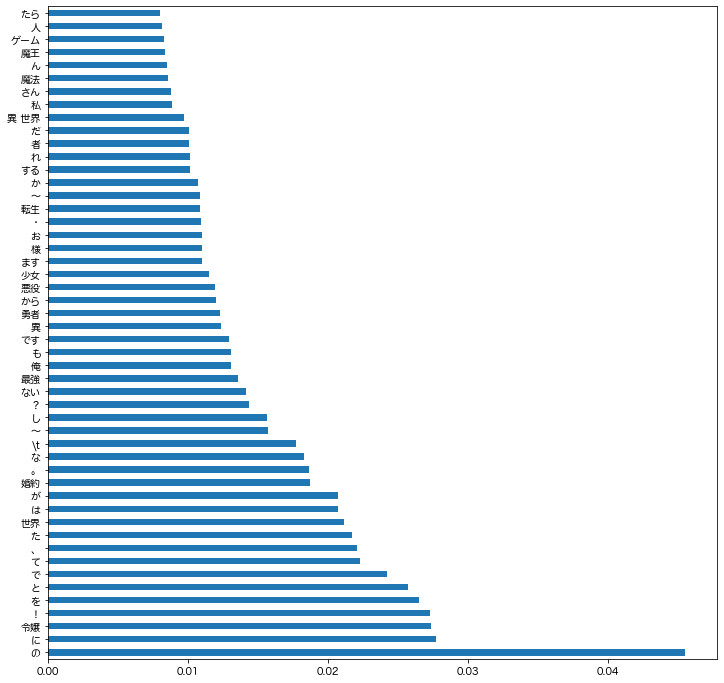

In [17]:
categories = df_bookmark100_rensai.Genre
run_rf(categories, count_vectorizer, count_matrix)

In [11]:
## 下位ジャンルごとの平均
count_100 = pd.DataFrame(count_matrix.toarray(),columns=count_vectorizer.get_feature_names())
count_100["Genre"] = df_bookmark100_rensai.Genre
data = count_100.groupby(["Genre"]).mean()

In [12]:
## その他が外れ値になって見にくいため削除
dropna = [each for each in data.index if "その他" in each]
data.drop(index=dropna, inplace=True)

No handles with labels found to put in legend.


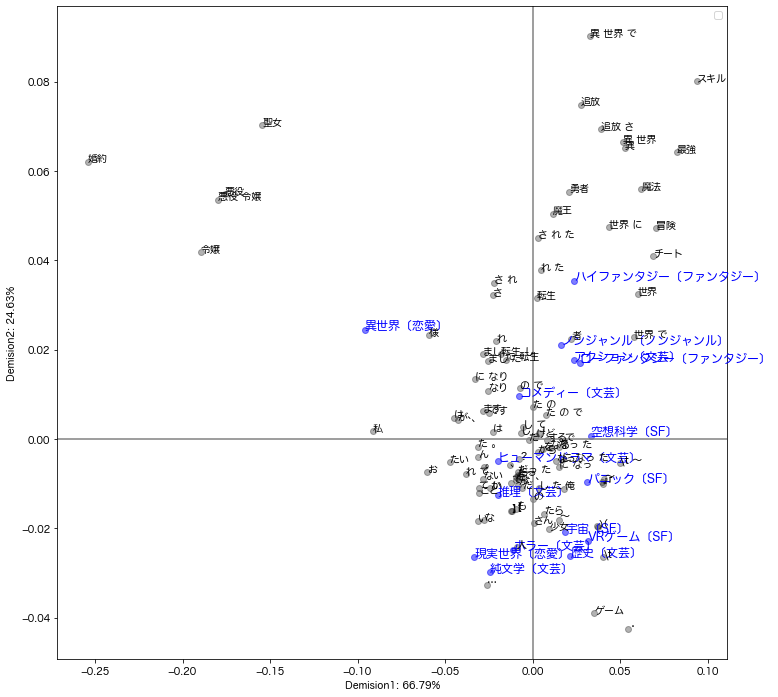

In [13]:
import mca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## コレスポンデンス実行
mca_counts = mca.MCA(data)

rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2) 

## row
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

labels_row = data.index

ax.scatter(rows[:,0], rows[:,1], c='blue',alpha=0.5)
for label,x,y in zip(labels_row,rows[:,0],rows[:,1]):
    plt.annotate(label,xy = (x, y), c="blue",size=12)


## column
ax.scatter(cols[:,0], cols[:,1], c='black',alpha=0.3)
labels_col = data.columns
for label,x,y in zip(labels_col,cols[:,0],cols[:,1]):
    plt.annotate(label,xy = (x, y), c="black", size=10)

ratio = mca_counts.expl_var(greenacre=False, N=2)
ax.set_xlabel("Demision1: " + str(round(ratio[0]*100,2)) + "%")
ax.set_ylabel("Demision2: " + str(round(ratio[1]*100,2)) + "%")

ax.legend()
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')  
plt.rcParams["font.sans-serif"] = ["Hiragino Maru Gothic Pro"]
plt.show()

In [14]:
## 上位ジャンルと年で分けて試す
count_100 = pd.DataFrame(count_matrix.toarray(),columns=count_vectorizer.get_feature_names())
count_100["Group"] = df_bookmark100_rensai.Group
count_100["Year"] = df_bookmark100_rensai.Year

data = count_100.groupby(["Group","Year"]).mean()

In [15]:
## カテゴリーごとの数10以下は取り除く。外れ値になりやすい
count_textgroup = count_100.groupby(["Group","Year"]).size()
dropna = count_textgroup[count_textgroup<10].index.tolist()
data.drop(index=dropna, inplace=True)

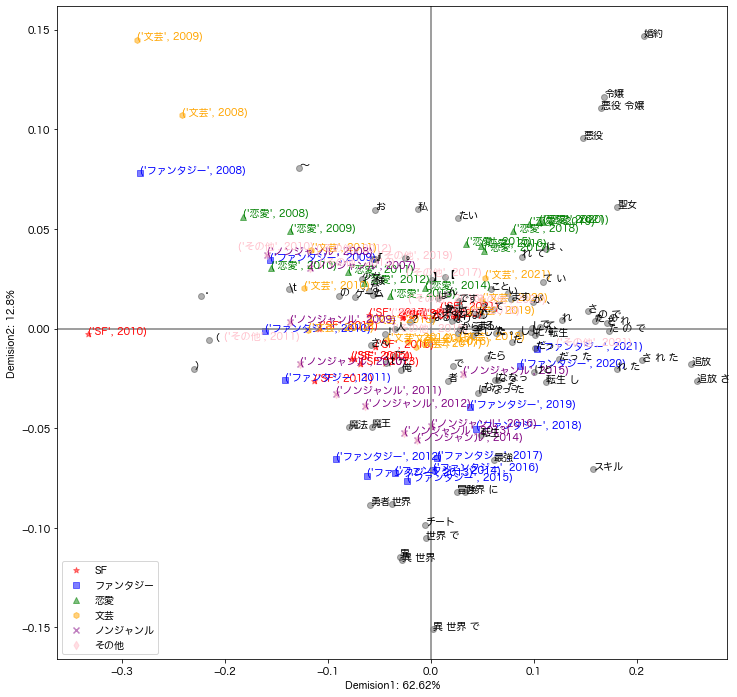

In [16]:
## ジャンルごとのindex_list
index_lst = list(data.index)

sf = [index_lst.index(each) for each in index_lst if each[0] == "SF"]
fantasy = [index_lst.index(each) for each in index_lst if each[0] == "ファンタジー"]
love = [index_lst.index(each) for each in index_lst if each[0] == "恋愛"]
bungei = [index_lst.index(each) for each in index_lst if each[0] == "文芸"]
nongenre = [index_lst.index(each) for each in index_lst if each[0] == "ノンジャンル"]
others = [index_lst.index(each) for each in index_lst if each[0] == "その他"]
indexes_lst = [sf, fantasy, love, bungei, nongenre, others]


## コレスポンデンス実行
mca_counts = mca.MCA(data)

rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2) 

sf_rows = np.array([rows[each].tolist() for each in sf])
fantasy_rows = np.array([rows[each].tolist() for each in fantasy])
love_rows = np.array([rows[each].tolist() for each in love])
bungei_rows = np.array([rows[each].tolist() for each in bungei])
nongenre_rows = np.array([rows[each].tolist() for each in nongenre])
others_rows = np.array([rows[each].tolist() for each in others])
rows_lst = [sf_rows, fantasy_rows, love_rows, bungei_rows, nongenre_rows, others_rows]


## row
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

labels_row = data.index

ax.scatter(sf_rows[:,0],sf_rows[:,1], c='red', marker = "*", alpha=0.5, label="SF")
ax.scatter(fantasy_rows[:,0],fantasy_rows[:,1], c='blue', marker = "s", alpha=0.5, label="ファンタジー")
ax.scatter(love_rows[:,0],love_rows[:,1], c='green', marker = "^", alpha=0.5, label="恋愛")
ax.scatter(bungei_rows[:,0],bungei_rows[:,1], c='orange', marker = "h", alpha=0.5, label="文芸")
ax.scatter(nongenre_rows[:,0],nongenre_rows[:,1], c='purple', marker = "x", alpha=0.5, label="ノンジャンル")
ax.scatter(nongenre_rows[:,0],nongenre_rows[:,1], c='pink', marker = "d", alpha=0.5, label="その他")

color_lst = ["red","blue","green","orange","purple","pink"]
for indexes, rows, color in zip(indexes_lst, rows_lst, color_lst):
    for label,x,y in zip(labels_row[indexes],rows[:,0],rows[:,1]):
        plt.annotate(label,xy = (x, y), c=color,size=10)

        
## column
ax.scatter(cols[:,0], cols[:,1], c='black',alpha=0.3)
labels_col = data.columns
for label,x,y in zip(labels_col,cols[:,0],cols[:,1]):
    plt.annotate(label,xy = (x, y), c="black", size=10)

ratio = mca_counts.expl_var(greenacre=False, N=2)
ax.set_xlabel("Demision1: " + str(round(ratio[0]*100,2)) + "%")
ax.set_ylabel("Demision2: " + str(round(ratio[1]*100,2)) + "%")

ax.legend()
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')  
plt.rcParams["font.sans-serif"] = ["Hiragino Maru Gothic Pro"]
plt.show()